In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Cargar los datos 
df_messages = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_messages.csv")
df_usuarios = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_users.csv")
df_internet = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_internet.csv")
df_calls = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_calls.csv")
df_plans = pd.read_csv("/Users/chants/Desktop/PruebaDM_cucalon/Data/RAW/megaline_plans.csv")

In [11]:
# Mostrar información general
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Ver primeras filas
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [13]:
# Ver valores nulos por columna
print("\nValores nulos por columna:")
print(df_calls.isnull().sum())


Valores nulos por columna:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [14]:
# Ver duplicados
print("\nFilas duplicadas:", df_calls.duplicated().sum())


Filas duplicadas: 0


In [15]:
# Estadísticas descriptivas
display(df_calls.describe())

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000



Resumen de outliers:
{'user_id': 0, 'duration': 508}


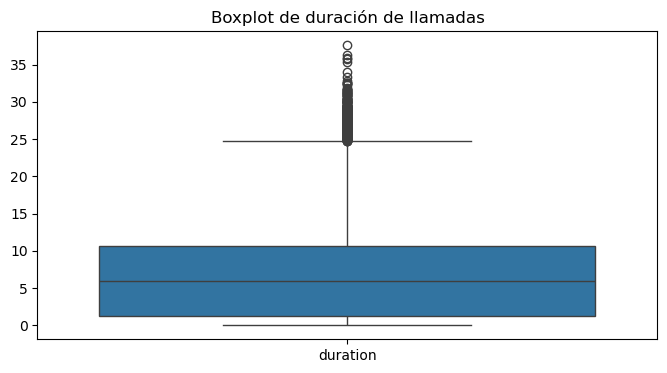

In [4]:
# Detección de Outliers usando IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_summary = {}
for col in df_calls.select_dtypes(include=[np.number]).columns:
    outliers = detect_outliers_iqr(df_calls, col)
    outliers_summary[col] = len(outliers)

print("\nResumen de outliers:")
print(outliers_summary)

# Visualización de outliers con boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_calls[["duration"]])
plt.title("Boxplot de duración de llamadas")
plt.show()

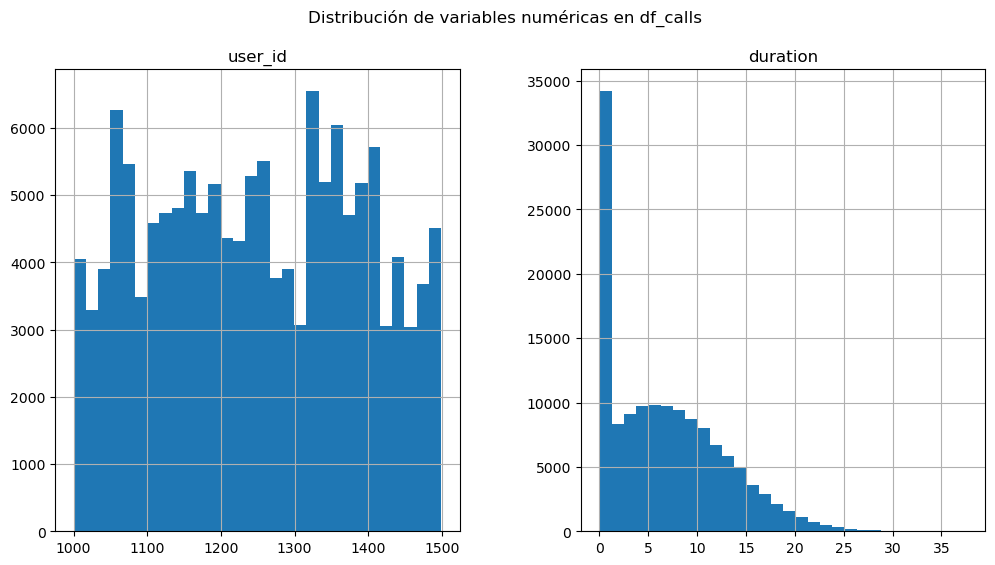

In [5]:
# Histograma para ver la distribución de variables numéricas
df_calls.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 6))
plt.suptitle("Distribución de variables numéricas en df_calls")
plt.show()

In [9]:
# Unir df_usuario con df_calls en base a user_id
df_merged = df_calls.merge(df_usuarios, on="user_id", how="left")

# Ver relación entre edad y duración de llamadas
df_merged.groupby("age")["duration"].describe()


,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18,6000.0,6.705812,5.769101,0.0,1.2775,5.980,10.7425,31.18
19,2940.0,6.780146,5.908129,0.0,1.3600,5.925,10.7075,31.68
20,2597.0,6.822915,5.902676,0.0,1.2600,6.140,10.9200,31.82
21,2570.0,6.787117,5.873155,0.0,1.1000,6.020,10.9850,32.53
22,1375.0,6.886902,5.886457,0.0,1.3650,6.290,10.8000,29.33
23,3787.0,6.585873,5.786701,0.0,1.0900,5.740,10.5050,30.84
24,1332.0,6.847335,5.877546,0.0,1.2700,6.130,10.8025,28.53
25,2102.0,6.881974,5.887915,0.0,1.5775,6.150,10.7100,28.83
26,1815.0,6.700275,5.843597,0.0,1.2850,5.790,10.6250,33.35


In [11]:
# Duración total de llamadas por fecha
df_merged.groupby("call_date")["duration"].sum().reset_index()


,call_date,duration
0,2018-01-15,30.75
1,2018-01-16,68.85
2,2018-01-17,27.28
3,2018-01-18,51.31
4,2018-01-19,73.08
...,...,...
346,2018-12-27,7473.14
347,2018-12-28,7528.97
348,2018-12-29,7331.29
349,2018-12-30,7224.98


In [12]:
# Calcular correlación entre edad y duración de llamadas
correlation = df_merged[["age", "duration"]].corr()
print(correlation)


               age  duration
age       1.000000 -0.002895
duration -0.002895  1.000000
